In [1]:
with open("input17.dat", "r") as file:
    lossmap = file.readlines()
lossmap = [list(map(int,line.removesuffix("\n"))) for line in lossmap]
max_v, max_h = len(lossmap), len(lossmap[0])
# lossmap = {(i,j) : lossmap[i][j] for i in range(max_v) for j in range(max_h)} #makes it ~11% slower 

In [4]:
sum([sum(lossmaprow) for lossmaprow in lossmap]), sum([sum(lossmap[i]) for i in range(len(lossmap))])

(106895, 106895)

In [10]:
#A* algorithm with goal-distance estimate being taxicab norm times average weight (times a factor <1 that heuristically makes the result correct)
import heapq

def create_full_set(initial_point, max_v, max_h, step_range=range(1,4), with_out_of_border=False):
    if with_out_of_border:
        full_set = {((i,j),direc,n_steps) for i in range(max_v) for j in range(max_h) for direc in range(4) for n_steps in step_range if (i,j)!= initial_point[0]}
        full_set.add(initial_point)
        return full_set
    full_set = {((i,j),direc,n_steps) for i in range(1,max_v-1) for j in range(1,max_h-1) for direc in range(4) for n_steps in step_range}
    full_set.update({((   0   ,j),direc,n_steps) for j in range(1,max_h-1) for direc in [0,2,3] for n_steps in step_range})
    full_set.update({((max_v-1,j),direc,n_steps) for j in range(1,max_h-1) for direc in [0,1,2] for n_steps in step_range})
    full_set.update({((i,   0   ),direc,n_steps) for i in range(1,max_v-1) for direc in [1,2,3] for n_steps in step_range})
    full_set.update({((i,max_h-1),direc,n_steps) for i in range(1,max_v-1) for direc in [0,1,3] for n_steps in step_range})
    full_set.update({((0,max_h-1),direc,n_steps) for direc in [0,3] for n_steps in step_range})
    full_set.update({((max_v-1,0),direc,n_steps) for direc in [1,2] for n_steps in step_range})
    full_set.update({((max_v-1,max_h-1),direc,n_steps) for direc in [0,1] for n_steps in step_range})
    full_set.add(initial_point)
    return full_set

inf = 10**5 #10**5 playing role of infinity
avg_w = round(sum([sum(lossmaprow) for lossmaprow in lossmap])/max_v/max_h,1)*.8 #average weight of the map for taxicab estimate, times a heuristic factor <1 (to make it effectively admissible)
min_w = min({min(lossmaprow) for lossmaprow in lossmap})*2 #minimal weight of the map for taxicab estimate
delta = {0: (0,1), 1: (1,0), 2: (0,-1), 3: (-1,0)}

initial_point = ((0,0),0,0)

full_set = create_full_set(initial_point, max_v, max_h)
estimate = {item: inf for item in full_set} #inf distance to initial point (yet) + taxicab distance to goal
estimate.update({initial_point: (max_v-1-initial_point[0][0]+max_h-1-initial_point[0][1])*min_w}) #0 distance to initial point + taxicab distance to goal

seen = [] #(dist[point],point) for set of points that have not been visited, but seen (neighbors have been visited)
#using heap priority queue (heapq) on this set

dist_curr, current = 0, initial_point
current, curr_estim = initial_point, estimate[initial_point]

while current[0]!=(max_v-1, max_h-1):
    next_dirs = set(range(4))
    next_dirs.remove((current[1]+2)%4)
    if current[2]==3:
          next_dirs.remove(current[1])
    successors = {(tuple(map(sum,zip(current[0],delta[direc]))),)+(direc, current[2]+1 if direc==current[1] else 1) for direc in next_dirs}
    successors = {point for point in successors if point[0][0] in range(max_v) and point[0][1] in range(max_h) and point in full_set}
    for neighbor in successors:
            new_dist = dist_curr + lossmap[neighbor[0][0]][neighbor[0][1]]
            new_estim = new_dist + (max_v-1-neighbor[0][0]+max_h-1-neighbor[0][1])*min_w
            if new_estim < estimate[neighbor]:
                estimate[neighbor] = new_estim
                heapq.heappush(seen, (new_estim, new_dist, neighbor)) #this version of seen even faster
    curr_estim, dist_curr, current = heapq.heappop(seen) 
    # print("\r"+str(len(unvisited)), end="            ")
    
the_min = min({estimate[k] for k in estimate if k[0]==(max_v-1, max_h-1)})
int(the_min) if the_min%1==0 else the_min

1023

In [29]:
with open("input17.dat", "r") as file:
    lossmap = file.readlines()
lossmap = [list(map(int,line.removesuffix("\n"))) for line in lossmap]
max_v, max_h = len(lossmap), len(lossmap[0])
# lossmap = {(i,j) : lossmap[i][j] for i in range(max_v) for j in range(max_h)} #makes it ~11% slower 

In [34]:
#Dijkstra's algorithm
import heapq

def create_full_set(max_v, max_h, include_initial=True, initial_point=((0,0),0,0), step_range=range(4,11), with_out_of_border=False):
    if with_out_of_border:
        full_set = {((i,j),direc,n_steps) for i in range(max_v) for j in range(max_h) for direc in range(4) for n_steps in step_range if (i,j)!= initial_point[0]}
        return full_set
    else:
        full_set = {((i,j),direc,n_steps) for i in range(1,max_v-1) for j in range(1,max_h-1) for direc in range(4) for n_steps in step_range}
        full_set.update({((   0   ,j),direc,n_steps) for j in range(1,max_h-1) for direc in [0,2,3] for n_steps in step_range})
        full_set.update({((max_v-1,j),direc,n_steps) for j in range(1,max_h-1) for direc in [0,1,2] for n_steps in step_range})
        full_set.update({((i,   0   ),direc,n_steps) for i in range(1,max_v-1) for direc in [1,2,3] for n_steps in step_range})
        full_set.update({((i,max_h-1),direc,n_steps) for i in range(1,max_v-1) for direc in [0,1,3] for n_steps in step_range})
        full_set.update({((0,max_h-1),direc,n_steps) for direc in [0,3] for n_steps in step_range})
        full_set.update({((max_v-1,0),direc,n_steps) for direc in [1,2] for n_steps in step_range})
        full_set.update({((max_v-1,max_h-1),direc,n_steps) for direc in [0,1] for n_steps in step_range})
    if include_initial:
        full_set.add(initial_point)
    return full_set

inf = 10**5 #10**5 playing role of infinity
avg_w = round(sum([sum(lossmaprow) for lossmaprow in lossmap])/max_v/max_h,1)*.75 #average weight of the map for taxicab estimate, times a heuristic factor <1
min_w = min({min(lossmaprow) for lossmaprow in lossmap})*3
delta  = {0: (0,1), 1: (1,0), 2: (0,-1), 3: (-1,0)}
delta4 = {0: (0,4), 1: (4,0), 2: (0,-4), 3: (-4,0)}

initial_point = ((0,0),0,0)

full_set = create_full_set(max_v, max_h, include_initial=False)
estimate = {item: inf for item in full_set} #inf distance to initial point (yet) + taxicab distance to goal
estimate.update({initial_point: (max_v-1-initial_point[0][0]+max_h-1-initial_point[0][1])*min_w}) #0 distance to initial point + taxicab distance to goal
seen = [] #(dist[point],point) for set of points that have not been visited, but seen (neighbors have been visited)
#using heap priority queue (heapq) on this set

dist_curr, current = 0, initial_point
current, curr_estim = initial_point, estimate[initial_point]

other_dirs = {0,1} #custom-made for first step because steps allowed are different (+4 in 0,1, nothing else)
successors = {(tuple(map(sum,zip(current[0],delta4[direc]))),)+(direc, 4) for direc in other_dirs}    
for neighbor in successors:
        mid_point = tuple(map(sum,zip(current[0],delta[neighbor[1]])))
        new_dist = dist_curr  + lossmap[mid_point[0]][mid_point[1]]
        for _ in range(3):
            mid_point = tuple(map(sum,zip(mid_point,delta[neighbor[1]])))
            new_dist += lossmap[mid_point[0]][mid_point[1]]
        new_estim = new_dist + (max_v-1-neighbor[0][0]+max_h-1-neighbor[0][1])*min_w    
        if new_estim < estimate[neighbor]:
                estimate[neighbor] = new_estim
                heapq.heappush(seen, (new_estim, new_dist, neighbor)) #this version of seen even faster
curr_estim, dist_curr, current = heapq.heappop(seen)

while current[0]!=(max_v-1, max_h-1):
    successors = {(tuple(map(sum,zip(current[0],delta4[direc]))),)+(direc, 4) for direc in {(current[1]+1)%4, (current[1]+3)%4}}#other directions
    if current[2]!=10:#same direc
        successors.add((tuple(map(sum,zip(current[0],delta[current[1]]))),)+(current[1], current[2]+1))      
    successors = {point for point in successors if point[0][0] in range(max_v) and point[0][1] in range(max_h) and point in full_set}
    for neighbor in successors:
            new_dist = dist_curr + lossmap[neighbor[0][0]][neighbor[0][1]]
            if neighbor[-1]==4:
                 mid_point = current[0]
                 for _ in range(3):
                    mid_point = tuple(map(sum,zip(mid_point,delta[neighbor[1]])))
                    new_dist += lossmap[mid_point[0]][mid_point[1]]
            new_estim = new_dist + (max_v-1-neighbor[0][0]+max_h-1-neighbor[0][1])*min_w
            if new_estim < estimate[neighbor]:
                estimate[neighbor] = new_estim
                heapq.heappush(seen, (new_estim, new_dist, neighbor)) #this version of seen even faster
    # full_set.remove(current)
    curr_estim, dist_curr, current = heapq.heappop(seen) #this search MUCH faster with seen instead of all unvisited
    # print("\r"+str(len(unvisited)), end="            ")

the_min = min({estimate[k] for k in estimate if k[0]==(max_v-1, max_h-1)})
int(the_min) if the_min%1==0 else the_min

1165

In [41]:
import numpy as np
import time

t = time.time()
for _ in range(10**6):
    x = np.random.randint(10)+np.random.randint(1)/2
    x if x%1 else int(x)
print('Time taken the "if x%1" way:',time.time()-t,"s")

t = time.time()
for _ in range(10**6):
    x = np.random.randint(10)+np.random.randint(1)/2
    int(x) if x%1==0 else x
print('Time taken the "if x%1==0" way:',time.time()-t,"s")

Time taken the "if x%1" way: 5.80836820602417 s
Time taken the "if x%1==0" way: 6.31765604019165 s


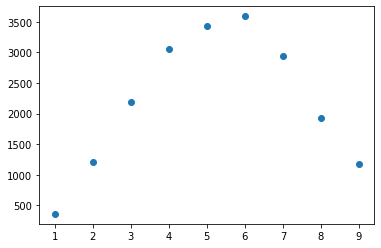

In [33]:
import matplotlib.pyplot as plt
all_weights = [i for row in lossmap for i in row]
# plt.hist(all_weights, bins=[1,2,3,4,5,6,7,8,9,9.5]);
plt.scatter(y=[all_weights.count(i) for i in range(1,10)], x=range(1,10));
# max(all_weights)